# Homework 7 - Naiara Alonso Montes

## Exercise 1

The Fibonacci sequence is defined as $F(0) = 0$, $F(1) = 1$ and $F(n)=F(n - 1) + F(n - 2)$.

Working with finite number in modulo $m$, our range of values is limited to $[0, m - 1]$. For each pair of consecutive numbers $(F(n), F(n + 1))$ we can have $m^2$ different pairs.

By Pideonole Principle, if we generate more than $m^2 + 1$ data, at least one pair must repeat, and the sequence must be repeated again.

**Upper bound from the start, $F(0)$**

As explained the sequence must repeat at most after generating $m^2 + 1$ terms.

**Upper bound for the length of the cycle**

With the same approach, once the cycle starts repeating, we have again $m^2$ distinct pairs so, in the worst case, the length will be $m^2$ is the last pair is the one that is repeating.

## Exercise 2

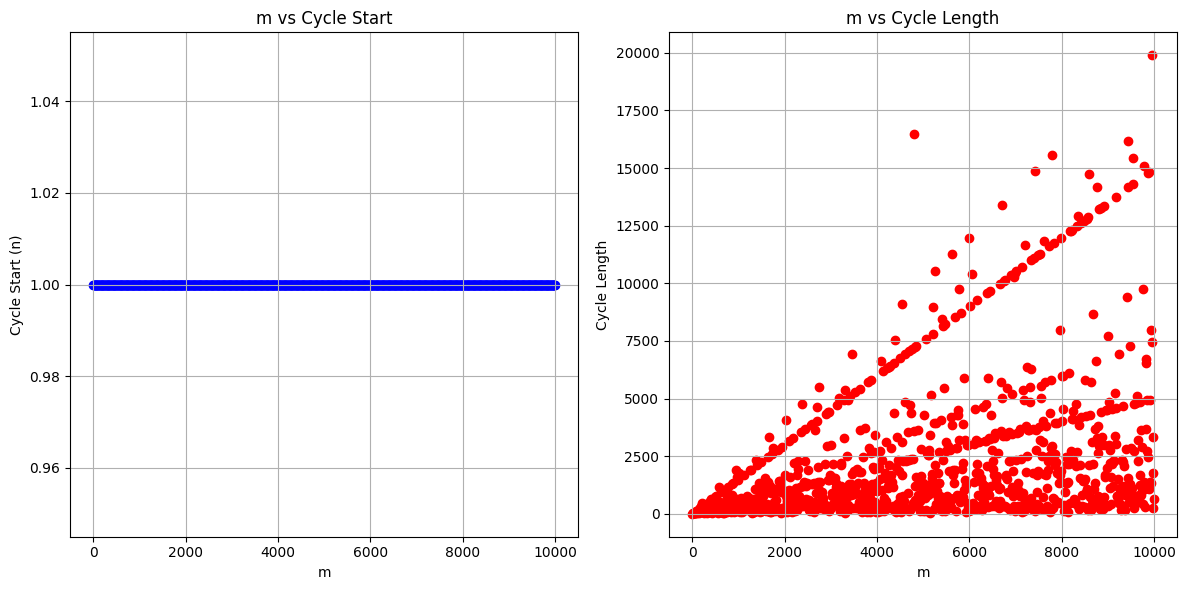

In [ ]:
import matplotlib.pyplot as plt

def pisano_period_with_cycle_start(m):
    a, b = 0, 1
    fib_index = 1
    hash_table = {(a, b): fib_index}

    for i in range(0, m * m):
        a, b = b, (a + b) % m
        fib_index += 1

        if (a, b) in hash_table: # if pair of values collide in hash table
            cycle_start = hash_table[(a, b)]
            cycle_length = fib_index - cycle_start
            return cycle_start, cycle_length
        else:
            hash_table[(a, b)] = fib_index

m_values = list(range(2, 10001, 10))

results = []

for m_val in m_values:
    cycle_start, cycle_length = pisano_period_with_cycle_start(m_val)
    results.append((m_val, cycle_start, cycle_length))
    # print(f"For modulo {m_val}, the cycle starts at F({cycle_start}) and the cycle length is {cycle_length}")

m_values = [r[0] for r in results]
cycle_starts = [r[1] for r in results]
cycle_lengths = [r[2] for r in results]

plt.figure(figsize=(12, 6))

# Plot cycle start
plt.subplot(1, 2, 1)
plt.scatter(m_values, cycle_starts, c='blue', label='Cycle Start')
plt.xlabel('m')
plt.ylabel('Cycle Start (n)')
plt.title('m vs Cycle Start')
plt.grid(True)

# Plot cycle length
plt.subplot(1, 2, 2)
plt.scatter(m_values, cycle_lengths, c='red', label='Cycle Length')
plt.xlabel('m')
plt.ylabel('Cycle Length')
plt.title('m vs Cycle Length')
plt.grid(True)

plt.tight_layout()
plt.show()


As seen in the plots, the cycle starts (that reflects the value of $F(n)$ in which the cycle repeats) is equal to the value of $m$. In the upper bound that I approximate in the previous exercise I was being pesimistic (a little bit too much).

For the cycle length, the distribution is not uniform, and it suggests that, for specific values of $m$, the length follows a pattern. ChatGPT said that this can be explained either because of the factorization of $m$ in relation with the prime numbers, or the powers of prime numbers.

[2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096, 8192, 16384]


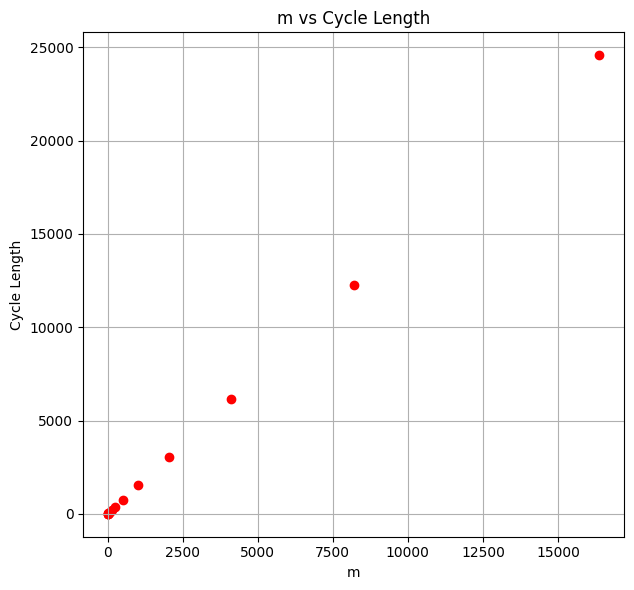

In [ ]:
m_values = [2**i for i in range(1, 15)]
print(m_values)

results = []

for m_val in m_values:
    cycle_start, cycle_length = pisano_period_with_cycle_start(m_val)
    results.append((m_val, cycle_start, cycle_length))
    # print(f"For modulo {m_val}, the cycle starts at F({cycle_start}) and the cycle length is {cycle_length}")

m_values = [r[0] for r in results]
cycle_starts = [r[1] for r in results]
cycle_lengths = [r[2] for r in results]

plt.figure(figsize=(12, 6))

# Plot cycle length
plt.subplot(1, 2, 2)
plt.scatter(m_values, cycle_lengths, c='red', label='Cycle Length')
plt.xlabel('m')
plt.ylabel('Cycle Length')
plt.title('m vs Cycle Length')
plt.grid(True)

plt.tight_layout()
plt.show()


ChatGPT suggesions seem to be true and have something to do with prime numbers and its powers. The upper graph is for powers of 2.

### Exercise 3

For the first 2 implementations the results are exactly the same. To compare the logarithmic counter to the "original" counter we should do $base^{count}$. If I plot the results I get something like this:

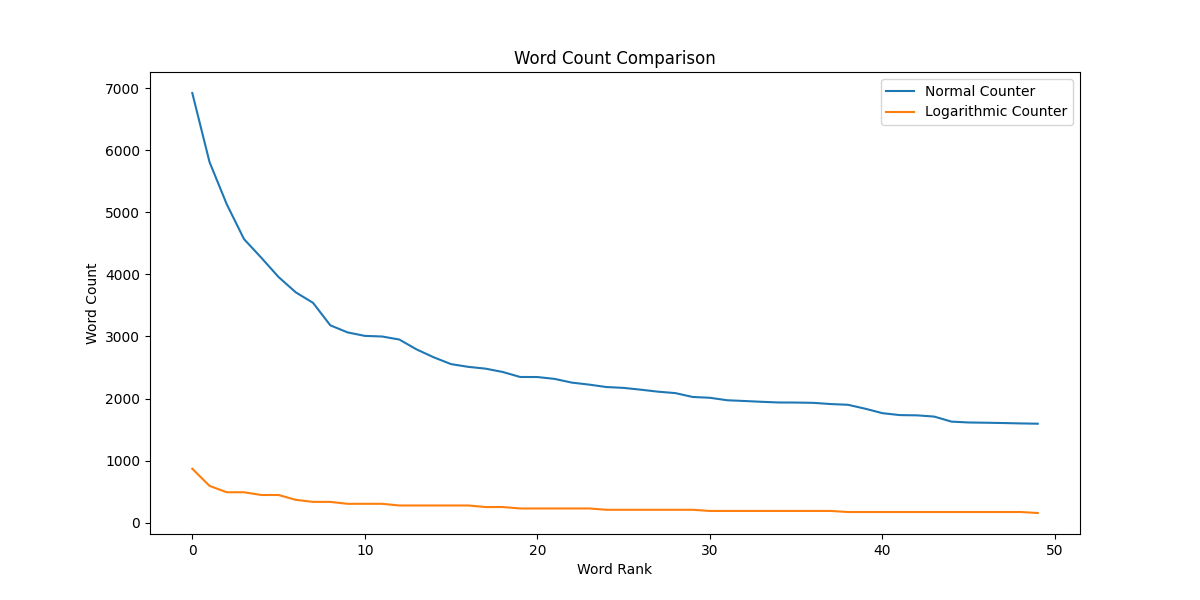

The results are not really clear so I decided to plot the ratio between both results.

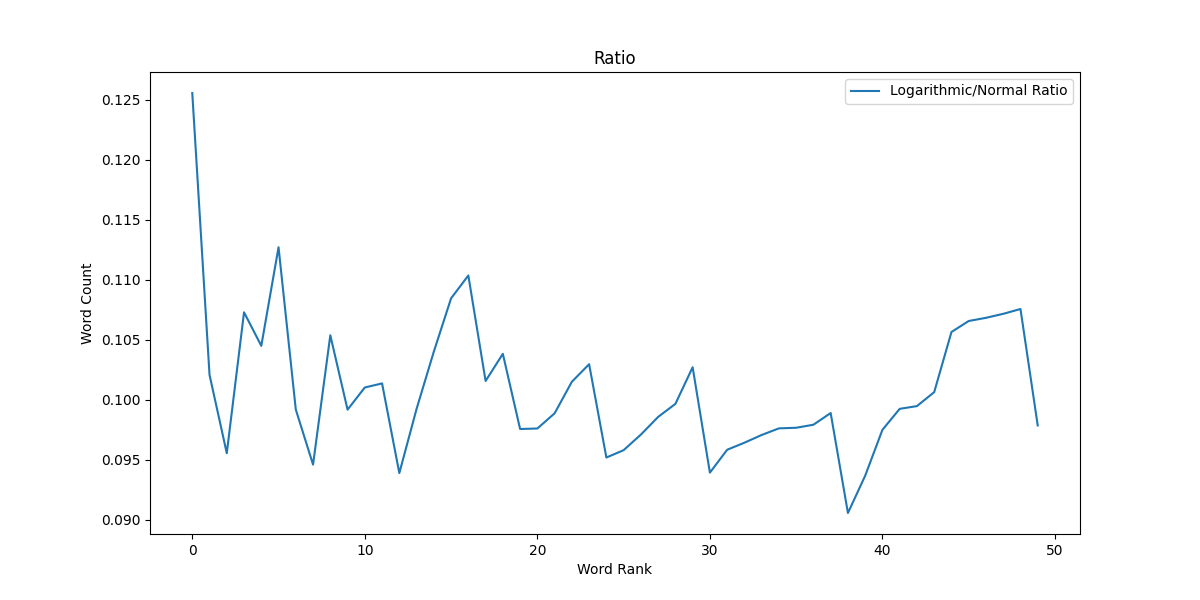


Basically, after this I can't say that the log counter is accurate, besides I think that something is going wrong... there seems that there is no relation between counters...

This table represents the time taken for each implementation:

|Python dictionary|Self-made hash map|Self-made hash map log counter|
|-|-|-|
|24.395s|26.015s|31.843s|

## Exercise 4

The parameters for the bloom filter are:
* $n$, expected size which is equal in our case to 1M, as we are generating 1M words.
* $p$ is the false positive probability, equal to 1% or 0.01.
* $m$ is the size of the bit array, defined with the formula $-\frac{n \cdot \ln(p)}{(\ln(2))^2}$. In our case is 9585059.
* $k$, the number of hash functions, defined by $\frac{m}{n} \cdot \ln(2)$, which is equal to 7.

With all parameters set, we can start working with the bloom filter.

After running the code I got:
```console
False positive rate: 0.21%
```

That it is actually much more better than the problem restictions.

### Exercise 5

Based on both previous implementations, the bloom filter and the logarithmic counter. I mixed them up together, so now I am able to delete a element from the bloom bucket by decreasing the value. If all values are differet from 0, it returns positive.

Now the achieved accuracy is:
```console
False positive rate: 0.21%
```

The false positive rate is still smaller than the restrictions and it has even improved the "normal" bloom filter.

In [1]:
!jupyter nbconvert --to html HW7.ipynb

[NbConvertApp] Converting notebook HW7.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 2 image(s).
[NbConvertApp] Writing 508244 bytes to HW7.html
